<a href="https://colab.research.google.com/github/Alex112525/Neural-networks-fundamentals/blob/main/Regression_(with_K_Fold_validation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras import layers, models, optimizers

#Import Dataset

The Boston Housing dataset is a classic dataset used for regression problem in machine learning. It contains information about the housing values in suburbs of Boston. The data was collected in the late 1970s and consists of 506 samples with 13 features each, including the per capita crime rate, average number of rooms per dwelling, accessibility to highways, property tax rate, etc.

In [ ]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [ ]:
train_labels[0]

15.2

The purpose of normalizing the data is to scale it so that it has zero mean and unit variance. This is done to make the data more suitable for use in machine learning models, as it helps to prevent features with larger scale values from dominating the optimization process. Additionally, normalizing the data helps to stabilize the training process and reduce the chances of numerical instability. By having a more well-behaved dataset, models can converge faster and more reliably.

In [ ]:
## Normalize
mean = train_data.mean(axis=0)
train_data = train_data - mean
std = train_data.std(axis=0)
train_data = train_data / std

test_data = test_data - mean
test_data = test_data / std

These lines of code perform zero-mean normalization on the training data. 
* The first line calculates the mean of the training data along each feature.
* The second line subtracts the mean from each feature of the training data, which makes the mean of the resulting data zero. 
* The third line calculates the standard deviation of the data after subtraction of the mean
* and the fourth line divides each feature by its standard deviation, which makes the standard deviation of the resulting data one. 

This normalization is usually performed to bring all features to the same scale, so that the algorithms that process this data will treat all features equally, and the features with large absolute values will not dominate the algorithms' decision making.

In [ ]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

#Build Model

MAE stands for Mean Absolute Error. It's a commonly used metric for regression problems. The goal of regression is to predict a continuous value, and the MAE measures the average difference between the actual and predicted values. The formula for MAE is as follows:

**MAE = 1/n * Σ |actual_value - predicted_value|**

where n is the number of samples and actual_value and predicted_value are the ground truth and the model's prediction respectively.

The MAE gives an absolute measure of the difference between the actual and predicted values and is insensitive to the direction of the error (i.e., over- or under-prediction). This makes it a robust metric, but also one that can be harder to interpret than other metrics, such as Mean Squared Error (MSE).

In [ ]:
def buildModelRegression(input_data, lr_var):
  model = models.Sequential()
  model.add(layers.Dense(64, activation="relu", input_shape=(input_data,)))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(48, activation="relu"))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(1))
  
  model.compile(optimizer=optimizers.RMSprop(learning_rate=lr_var),
                loss = "mse",
                metrics = ["mae"])
  return model 

#Applying K-Fold Cross Validation

K-Fold Cross Validation is a model evaluation technique used in Machine Learning to assess the performance of a model. It involves partitioning the original training dataset into k equal parts or folds, training the model on k-1 parts, and evaluating it on the remaining one. 

This process is repeated k times, each time using a different part for evaluation, and the average performance of the model is calculated based on the results obtained from all k iterations. By evaluating the model on multiple folds, it helps to obtain a more robust estimate of the model's performance, as it covers more data points in the evaluation.

In [ ]:
k = 4
num_val_samples = len(train_data) // 4 
num_epoch = 120
all_history = []

In [ ]:
for i in range(k):
  print("Fold: ", i)
  val_data = train_data[(i)*num_val_samples : (i+1)*num_val_samples]
  val_targets = train_labels[(i)*num_val_samples : (i+1)*num_val_samples]

  partial_train_data = np.concatenate([
      train_data[:i * num_val_samples],
      train_data[(i+1) * num_val_samples:]
  ], axis=0)

  partial_train_targets = np.concatenate([
      train_labels[:i * num_val_samples],
      train_labels[(i+1) * num_val_samples:]
  ], axis=0)

  model = buildModelRegression(13, 0.0006)
  his = model.fit(partial_train_data,
                  partial_train_targets,
                  epochs=num_epoch,
                  batch_size=16,
                  validation_data=(val_data, val_targets),
                  verbose=0)
  all_history.append(his.history["val_mae"])

Fold:  0
Fold:  1
Fold:  2
Fold:  3


In [ ]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

#Results

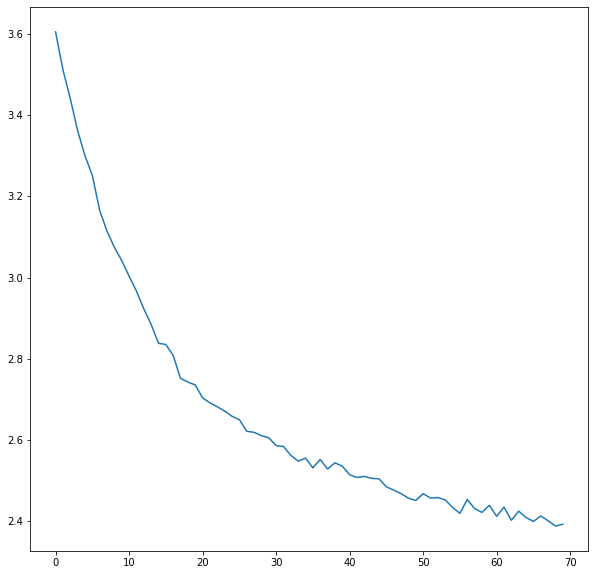

In [ ]:
fig = plt.figure(figsize=(10,10))
del_ = 20
plt.plot(range(num_epoch - del_), all_mae_avg[del_:])
plt.show()

In [ ]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 21.9181 - mae: 2.9634


[21.91806983947754, 2.963371753692627]